# Income Sources Analysis



In [1]:
#Importing Necessary Packages

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pystout import pystout
from tabulate import tabulate
import latextable

In [2]:
def confint(data):
    ci = 1.96 * np.std(data) / np.sqrt(len(data)-1)
    return ci

In [3]:
#Import Data
raw_data = pd.read_csv('ClimateChangeCalendar.csv')

raw_data


,HHID,Consent,IWDate,IWTime,IntrvrID,A1_72,A1_73,A1_74,A1_75,A1_76,...,E28_76,E28_77,E28_78,E29_72,E29_73,E29_74,E29_75,E29_76,E29_77,E29_78
0,2301006,1,20790230,31,166,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2301007,1,20790230,27,166,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2301013,1,20790230,17,166,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2301016,1,20790231,34,166,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2301017,1,20790231,43,166,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1,20790213,31,49,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
496,2611115,1,20790218,29,166,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
497,2611117,1,20790218,27,242,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
498,2611118,1,20790217,40,21,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1


# Analyzing Sources of Income

In [4]:
raw_income = pd.DataFrame()
income_titles = ['Farming', 'MeatMilk', 'SmallAnimals', 'Poultry', 'LocalRemit', 'IntilRemit', 'Business', 'Salary', 'WageLabor', 'Pension', 'Other']

raw_income['HHID'] = raw_data['HHID']

income_columns = ['A6_', 'B9b_', 'B10a_', 'B11a_', 'C12a_', 'C13a_', 'D14a_', 'D15a_', 'D16a_', 'D17a_', 'D18a_']

for col in raw_data.columns:
    for item, title in zip(income_columns, income_titles):
        if item in col:
            raw_income[col] = raw_data[col].astype(float)

raw_income.replace(-1, 0, inplace=True)

raw_income

,HHID,A6_72,A6_73,A6_74,A6_75,A6_76,A6_77,A6_78,B9b_72,B9b_73,...,D17a_76,D17a_77,D17a_78,D18a_72,D18a_73,D18a_74,D18a_75,D18a_76,D18a_77,D18a_78
0,2301006,25000.0,28000.0,0.0,0.0,0.0,35000.0,40000.0,120000.0,150000.0,...,160000.0,170000.0,180000.0,0.0,0.0,0.0,360000.0,360000.0,360000.0,360000.0
1,2301007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,12000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2301013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000.0,22000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2301016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,0.0,...,140000.0,140000.0,156000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2301017,18000.0,19000.0,20000.0,20000.0,35000.0,35000.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,15000.0,13500.0,13500.0,15000.0,15000.0,0.0,16000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,2611115,10000.0,15000.0,11000.0,13000.0,12000.0,14000.0,11000.0,0.0,0.0,...,48000.0,72000.0,72000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,2611117,30000.0,35000.0,28000.0,24000.0,31000.0,50000.0,40000.0,0.0,40000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,2611118,22000.0,23000.0,21000.0,22000.0,23000.0,22000.0,23000.0,0.0,0.0,...,0.0,0.0,12000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Converting from wide to long
column_heads = []

for item in income_columns:
    if '_' in item:
        column_heads.append(item[:-1])
    else:
        column_heads.append(item)
print(column_heads) 

pivoted_income = pd.wide_to_long(raw_income, column_heads, i='HHID', j="Year", sep='_').reset_index()

pivoted_income

['A6', 'B9b', 'B10a', 'B11a', 'C12a', 'C13a', 'D14a', 'D15a', 'D16a', 'D17a', 'D18a']


,HHID,Year,A6,B9b,B10a,B11a,C12a,C13a,D14a,D15a,D16a,D17a,D18a
0,2301006,72,25000.0,120000.0,0.0,0.0,0.0,0.0,0.0,120000.0,0.0,120000.0,0.0
1,2301007,72,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,72000.0,0.0,0.0
2,2301013,72,0.0,22000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2301016,72,0.0,20000.0,9000.0,0.0,0.0,0.0,400000.0,0.0,0.0,120000.0,0.0
4,2301017,72,18000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,78,16000.0,0.0,0.0,8000.0,0.0,0.0,0.0,180000.0,324000.0,0.0,0.0
3496,2611115,78,11000.0,27000.0,80000.0,0.0,0.0,0.0,0.0,0.0,300000.0,72000.0,0.0
3497,2611117,78,40000.0,80000.0,40000.0,10000.0,0.0,0.0,200000.0,0.0,0.0,0.0,0.0
3498,2611118,78,23000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000.0,12000.0,0.0


In [8]:
#Renaming column headers
dict1 = {}
for key, value in zip(pivoted_income.columns[2:], income_titles):
    dict1[key] = value

pivoted_income.rename(columns=dict1, inplace=True)
pivoted_income['Total'] = pivoted_income[income_titles].sum(axis=1)
pivoted_income


,HHID,Year,Farming,MeatMilk,SmallAnimals,Poultry,LocalRemit,IntilRemit,Business,Salary,WageLabor,Pension,Other,Total
0,2301006,72,25000.0,120000.0,0.0,0.0,0.0,0.0,0.0,120000.0,0.0,120000.0,0.0,385000.0
1,2301007,72,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,72000.0,0.0,0.0,82000.0
2,2301013,72,0.0,22000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000.0
3,2301016,72,0.0,20000.0,9000.0,0.0,0.0,0.0,400000.0,0.0,0.0,120000.0,0.0,549000.0
4,2301017,72,18000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,78,16000.0,0.0,0.0,8000.0,0.0,0.0,0.0,180000.0,324000.0,0.0,0.0,528000.0
3496,2611115,78,11000.0,27000.0,80000.0,0.0,0.0,0.0,0.0,0.0,300000.0,72000.0,0.0,490000.0
3497,2611117,78,40000.0,80000.0,40000.0,10000.0,0.0,0.0,200000.0,0.0,0.0,0.0,0.0,370000.0
3498,2611118,78,23000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000.0,12000.0,0.0,57000.0


In [9]:
#Grouping income streams by hh to calculate average income over 6 years
grouped_income = pivoted_income.groupby('HHID').mean().reset_index()
grouped_income.drop('Year', axis=1, inplace=True)
grouped_income

,HHID,Farming,MeatMilk,SmallAnimals,Poultry,LocalRemit,IntilRemit,Business,Salary,WageLabor,Pension,Other,Total
0,2301006,18285.714286,38571.428571,1000.000000,0.000000,0.000000,0.000000,0.000000,68800.000000,0.000000,150000.000000,205714.285714,4.823714e+05
1,2301007,0.000000,23285.714286,4428.571429,0.000000,0.000000,0.000000,7857.142857,0.000000,56285.714286,0.000000,0.000000,9.185714e+04
2,2301013,0.000000,43142.857143,3571.428571,0.000000,0.000000,214285.714286,0.000000,0.000000,0.000000,0.000000,0.000000,2.610000e+05
3,2301016,0.000000,21857.142857,9714.285714,0.000000,0.000000,0.000000,414285.714286,0.000000,0.000000,132285.714286,0.000000,5.781429e+05
4,2301017,26714.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64285.714286,0.000000,0.000000,0.000000,9.100000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,12571.428571,0.000000,0.000000,6142.857143,0.000000,167142.857143,0.000000,25714.285714,252000.000000,0.000000,0.000000,4.635714e+05
496,2611115,12285.714286,10285.714286,33571.428571,0.000000,0.000000,57142.857143,0.000000,0.000000,167142.857143,54857.142857,0.000000,3.352857e+05
497,2611117,34000.000000,46428.571429,48142.857143,13142.857143,0.000000,0.000000,28571.428571,0.000000,132142.857143,0.000000,0.000000,3.024286e+05
498,2611118,22285.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21428.571429,1714.285714,0.000000,4.542857e+04


In [10]:
#Calculating Income Proportions
income_prop = pd.DataFrame()
income_prop[['HHID', 'Year','Total']] = pivoted_income[['HHID', 'Year','Total']]

for col in pivoted_income.columns[2:]:
    income_prop[col + '_Prop'] = pivoted_income[col] / pivoted_income['Total']

income_prop

,HHID,Year,Total,Farming_Prop,MeatMilk_Prop,SmallAnimals_Prop,Poultry_Prop,LocalRemit_Prop,IntilRemit_Prop,Business_Prop,Salary_Prop,WageLabor_Prop,Pension_Prop,Other_Prop,Total_Prop
0,2301006,72,385000.0,0.064935,0.311688,0.000000,0.000000,0.000000,0.000000,0.000000,0.311688,0.000000,0.311688,0.0,1.0
1,2301007,72,82000.0,0.000000,0.121951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.878049,0.000000,0.0,1.0
2,2301013,72,22000.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
3,2301016,72,549000.0,0.000000,0.036430,0.016393,0.000000,0.000000,0.000000,0.728597,0.000000,0.000000,0.218579,0.0,1.0
4,2301017,72,18000.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,78,528000.0,0.030303,0.000000,0.000000,0.015152,0.000000,0.000000,0.000000,0.340909,0.613636,0.000000,0.0,1.0
3496,2611115,78,490000.0,0.022449,0.055102,0.163265,0.000000,0.000000,0.000000,0.000000,0.000000,0.612245,0.146939,0.0,1.0
3497,2611117,78,370000.0,0.108108,0.216216,0.108108,0.027027,0.000000,0.000000,0.540541,0.000000,0.000000,0.000000,0.0,1.0
3498,2611118,78,57000.0,0.403509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385965,0.210526,0.0,1.0


In [11]:
#Grouping Income prop
mean_income_prop = pd.DataFrame()
mean_income_prop[['HHID','Total']] = grouped_income[['HHID','Total']]

for col in grouped_income.columns[1:]:
    mean_income_prop[col + '_Prop'] = grouped_income[col] / grouped_income['Total']

mean_income_prop

,HHID,Total,Farming_Prop,MeatMilk_Prop,SmallAnimals_Prop,Poultry_Prop,LocalRemit_Prop,IntilRemit_Prop,Business_Prop,Salary_Prop,WageLabor_Prop,Pension_Prop,Other_Prop,Total_Prop
0,2301006,4.823714e+05,0.037908,0.079962,0.002073,0.000000,0.000000,0.000000,0.000000,0.142629,0.000000,0.310964,0.426464,1.0
1,2301007,9.185714e+04,0.000000,0.253499,0.048212,0.000000,0.000000,0.000000,0.085537,0.000000,0.612753,0.000000,0.000000,1.0
2,2301013,2.610000e+05,0.000000,0.165298,0.013684,0.000000,0.000000,0.821018,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,2301016,5.781429e+05,0.000000,0.037806,0.016803,0.000000,0.000000,0.000000,0.716580,0.000000,0.000000,0.228811,0.000000,1.0
4,2301017,9.100000e+04,0.293564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.706436,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,4.635714e+05,0.027119,0.000000,0.000000,0.013251,0.000000,0.360555,0.000000,0.055470,0.543606,0.000000,0.000000,1.0
496,2611115,3.352857e+05,0.036643,0.030677,0.100128,0.000000,0.000000,0.170430,0.000000,0.000000,0.498509,0.163613,0.000000,1.0
497,2611117,3.024286e+05,0.112423,0.153519,0.159188,0.043458,0.000000,0.000000,0.094473,0.000000,0.436939,0.000000,0.000000,1.0
498,2611118,4.542857e+04,0.490566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.471698,0.037736,0.000000,1.0


ValueError: 'label' must be of length 'x'

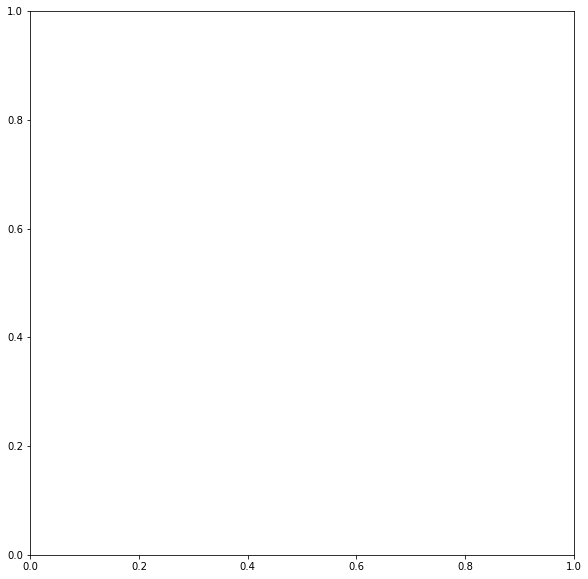

In [10]:
#Creating pie chart of mean income proportions

income_proportions = []

for item in mean_income_prop.columns[1:-1]:
    income_proportions.append(mean_income_prop[item].mean())
    
# Creating plot
fig = plt.figure(figsize =(10, 10))
plt.pie(income_proportions, labels = income_titles, autopct='%1.1f%%', textprops={'fontsize': 16})
 
# show plot
#plt.show()

plt.savefig('IncomePie.png', bbox_inches='tight')

## Income Blocks

In [22]:
#Creating dataframe of simplified income blocks
income_blocks = pd.DataFrame()
income_blocks[['HHID', 'Year', 'Total']] = pivoted_income[['HHID', 'Year', 'Total']]

income_dict = {'Farm': ['Farming'], 'Livestock':['MeatMilk', 'SmallAnimals', 'Poultry'], 'Remittances':['LocalRemit', 'IntilRemit'], 'Off-Farm Employment':['Business', 'Salary', 'WageLabor'], 'Other':['Pension', 'Other']}
income_values = {key : 0 for key in income_dict}

for key in income_dict:
    income_blocks[key] = 0
    for item in income_dict[key]:
        income_blocks[key] += pivoted_income[item]

income_blocks.to_csv('RawIncomes.csv')
income_blocks


,HHID,Year,Total,Farm,Livestock,Remittances,Off-Farm Employment,Other
0,2301006,72,385000.0,25000.0,120000.0,0.0,120000.0,120000.0
1,2301007,72,82000.0,0.0,10000.0,0.0,72000.0,0.0
2,2301013,72,22000.0,0.0,22000.0,0.0,0.0,0.0
3,2301016,72,549000.0,0.0,29000.0,0.0,400000.0,120000.0
4,2301017,72,18000.0,18000.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3495,2611114,78,528000.0,16000.0,8000.0,0.0,504000.0,0.0
3496,2611115,78,490000.0,11000.0,107000.0,0.0,300000.0,72000.0
3497,2611117,78,370000.0,40000.0,130000.0,0.0,200000.0,0.0
3498,2611118,78,57000.0,23000.0,0.0,0.0,22000.0,12000.0


In [23]:
#Household-Year Level proportion of income
hhyr_incomeprop = pd.DataFrame()

hhyr_incomeprop[['HHID', 'Year','Total']] = income_blocks[['HHID', 'Year','Total']]

for col in income_blocks.columns[3:]:
    hhyr_incomeprop[col + '_Prop'] = income_blocks[col] / income_blocks['Total']
    
hhyr_incomeprop.to_csv('IncomeBlocks.csv')
hhyr_incomeprop


,HHID,Year,Total,Farm_Prop,Livestock_Prop,Remittances_Prop,Off-Farm Employment_Prop,Other_Prop
0,2301006,72,385000.0,0.064935,0.311688,0.000000,0.311688,0.311688
1,2301007,72,82000.0,0.000000,0.121951,0.000000,0.878049,0.000000
2,2301013,72,22000.0,0.000000,1.000000,0.000000,0.000000,0.000000
3,2301016,72,549000.0,0.000000,0.052823,0.000000,0.728597,0.218579
4,2301017,72,18000.0,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
3495,2611114,78,528000.0,0.030303,0.015152,0.000000,0.954545,0.000000
3496,2611115,78,490000.0,0.022449,0.218367,0.000000,0.612245,0.146939
3497,2611117,78,370000.0,0.108108,0.351351,0.000000,0.540541,0.000000
3498,2611118,78,57000.0,0.403509,0.000000,0.000000,0.385965,0.210526


In [24]:
#Grouping income streams by Subward and Year
# Grouping by Sub-ward Level
hhyr_incomeprop['Subward'] = hhyr_incomeprop['HHID'].astype(str).str[:4].astype(int)

#Creating subward averages for each source
subwardyr_incomeprop = pd.DataFrame()
years = 7 #Number of years in panel dataset

for col in hhyr_incomeprop.columns[2:]:
    subwardyr_incomeprop[col] = hhyr_incomeprop.groupby(['Subward', 'Year'])[col].mean()


del subwardyr_incomeprop['Subward']


subwardyr_incomeprop.reset_index()
subwardyr_incomeprop.to_csv('SubwardYr_IncomeProp.csv')



In [25]:
hhyr_incomeprop.groupby(['Subward']).count()

,HHID,Year,Total,Farm_Prop,Livestock_Prop,Remittances_Prop,Off-Farm Employment_Prop,Other_Prop
Subward,,,,,,,,
2301,364,364,364,357,357,357,357,357
2304,742,742,742,736,736,736,736,736
2309,665,665,665,654,654,654,654,654
2605,343,343,343,332,332,332,332,332
2610,693,693,693,673,673,673,673,673
2611,693,693,693,689,689,689,689,689


In [26]:
#Aggregating just to subward (across all years)
subward_incomeprop = pd.DataFrame()

for col in subwardyr_incomeprop[2:]:
    subward_incomeprop[col] = subwardyr_incomeprop.groupby('Subward')[col].mean()
    
subward_incomeprop.reset_index()

subward_incomeprop.to_csv('Subward_IncomeProp.csv')

In [27]:
#Sum of Annual Distribution of Income by Block
annual_incomeblock = income_blocks.groupby('Year').sum().reset_index()

annual_incomeprop = pd.DataFrame()
annual_incomeprop['Year'] = annual_incomeblock['Year']

for col in annual_incomeblock.columns[3:]:
    annual_incomeprop[col] = annual_incomeblock[col] / annual_incomeblock['Total']

annual_incomeprop

,Year,Farm,Livestock,Remittances,Off-Farm Employment,Other
0,72,0.064943,0.122110,0.469412,0.279129,0.064406
1,73,0.066129,0.126564,0.454087,0.279476,0.073744
2,74,0.066415,0.125012,0.447706,0.288614,0.072253
3,75,0.060914,0.140026,0.440195,0.283958,0.074907
4,76,0.067853,0.122166,0.412320,0.313547,0.084114
5,77,0.062229,0.125719,0.395648,0.317954,0.098450
6,78,0.063341,0.149439,0.368020,0.327467,0.091732


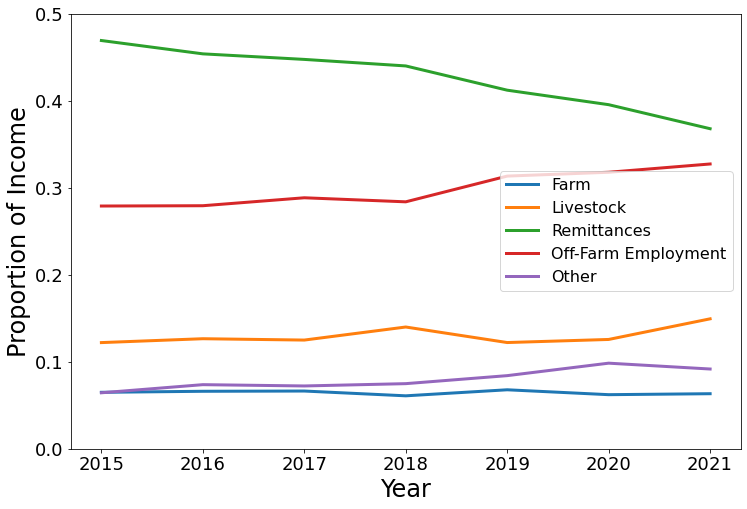

In [28]:
#Plot of Income Proportions over time

#Plotting Data
x = np.linspace(2015, 2021, 7)
f, ax1 = plt.subplots(figsize=[12,8]) 

strategies = ['Farm', 'Livestock', 'Remittances', 'Off-Farm Employment', 'Other']
for item in strategies:
    ax1.plot(x, annual_incomeprop[item], label=item, lw=3)

ax1.set_ylabel('Proportion of Income', size=24)
ax1.set_xlabel('Year', size=24)
ax1.set_ylim([0, 0.5])
plt.xticks(size=18)
plt.yticks(size=18)
#plt.axvline(x=2013, ls='--', label = 'Flood')
#plt.axvline(x=2016, ls='--', color = 'brown', label = 'Drought Year')
plt.legend(fontsize=16)
plt.show()

#plt.savefig('AnnualIncomeProp.png', bbox_inches='tight')


## Bar Chart of Income By Year

[1.072      1.178128   1.23114376 1.28162065 1.3405752  1.42235029
 1.4735549 ]


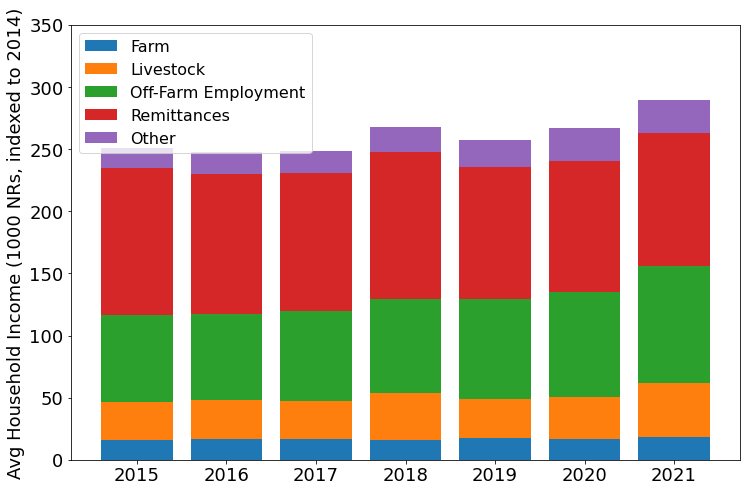

In [30]:
income_blocks
annual_income = income_blocks.groupby('Year').sum().reset_index() / (500 * 1000) #Convert to 1000 NRs per hh
inflation_rate = [1.072, 1.099, 1.045, 1.041, 1.046, 1.061, 1.036]
cumulative_inflation = np.zeros(len(inflation_rate))
cumulative_inflation[0] = inflation_rate[0]
for i in range(1,len(inflation_rate)):
    cumulative_inflation[i] = cumulative_inflation[i-1] * inflation_rate[i]
    
print(cumulative_inflation)    
normalized_income = annual_income

for col in normalized_income.columns[2:]:
    normalized_income[col] = annual_income[col] / cumulative_inflation


categories = ['Farm', 'Livestock', 'Off-Farm Employment', 'Remittances', 'Other']
no_cats = len(categories)
x = np.arange(2015,2022)

f,ax1 = plt.subplots(figsize=[12,8])
ax1.bar(x, normalized_income['Farm'], label='Farm')
runningtotal = normalized_income['Farm']
for i in range(1,no_cats):
    ax1.bar(x, normalized_income[categories[i]], bottom = runningtotal, label=categories[i])
    runningtotal += normalized_income[categories[i]]

ax1.set_ylim([0,350])    
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Avg Household Income (1000 NRs, indexed to 2014)', fontsize=18)
plt.legend(fontsize=16)
#plt.show()
plt.savefig('IncomeCompositionbar.png', bbox_inches='tight')

In [16]:
(normalized_income['Livestock'][6] - normalized_income['Livestock'][0]) / normalized_income['Livestock'][0]

0.4114715421103723

In [17]:
(normalized_income['Off-Farm Labor'][6] - normalized_income['Off-Farm Labor'][0]) / normalized_income['Off-Farm Labor'][0]

0.3530747256765428

In [18]:
normalized_income

,Year,HHID,Total,Farm,Livestock,Remittances,Off-Farm Labor,Other
0,0.000144,2455.586826,250.806250,250.806250,30.625933,117.731343,70.007276,16.153545
1,0.000146,2455.586826,248.072451,248.072451,31.396928,112.646504,69.330327,18.293938
2,0.000148,2455.586826,248.640256,248.640256,31.083048,111.317625,71.761075,17.965083
3,0.000150,2455.586826,267.511466,267.511466,37.458526,117.757153,75.962103,20.038379
4,0.000152,2455.586826,257.155957,257.155957,31.415694,106.030605,80.630463,21.630416
5,0.000154,2455.586826,267.166775,267.166775,33.588069,105.703919,84.946726,26.302480
6,0.000156,2455.586826,289.265700,289.265700,43.227633,106.455484,94.725076,26.535014


In [19]:
(normalized_income['Total'][6] - normalized_income['Total'][0]) / normalized_income['Total'][0]

0.15334326721168265

In [20]:
#Grouping income streams by hh to calculate average income over 6 years
grouped_incomeblock = income_blocks.groupby('HHID').mean().reset_index()
grouped_incomeblock.drop('Year', axis=1, inplace=True)
grouped_incomeblock

,HHID,Total,Farm,Livestock,Remittances,Off-Farm Labor,Other
0,2301006,4.823714e+05,18285.714286,39571.428571,0.000000e+00,68800.000000,355714.285714
1,2301007,9.185714e+04,0.000000,27714.285714,0.000000e+00,64142.857143,0.000000
2,2301013,2.610000e+05,0.000000,46714.285714,2.142857e+05,0.000000,0.000000
3,2301016,5.781429e+05,0.000000,31571.428571,0.000000e+00,414285.714286,132285.714286
4,2301017,9.100000e+04,26714.285714,0.000000,0.000000e+00,64285.714286,0.000000
...,...,...,...,...,...,...,...
495,2611114,4.635714e+05,12571.428571,6142.857143,1.671429e+05,277714.285714,0.000000
496,2611115,3.352857e+05,12285.714286,43857.142857,5.714286e+04,167142.857143,54857.142857
497,2611117,3.024286e+05,34000.000000,107714.285714,0.000000e+00,160714.285714,0.000000
498,2611118,4.542857e+04,22285.714286,0.000000,0.000000e+00,21428.571429,1714.285714


In [21]:
#Calculating Mean Income Proportions over 6 years
mean_incomeblock_prop = pd.DataFrame()
mean_incomeblock_prop['HHID'] = grouped_incomeblock['HHID']

for col in grouped_incomeblock.columns[1:]:
    mean_incomeblock_prop[col + '_Prop'] = grouped_incomeblock[col] / grouped_incomeblock['Total']
    
mean_incomeblock_prop.to_csv('MeanIncomes.csv')
mean_incomeblock_prop

,HHID,Total_Prop,Farm_Prop,Livestock_Prop,Remittances_Prop,Off-Farm Labor_Prop,Other_Prop
0,2301006,1.0,0.037908,0.082035,0.000000,0.142629,0.737428
1,2301007,1.0,0.000000,0.301711,0.000000,0.698289,0.000000
2,2301013,1.0,0.000000,0.178982,0.821018,0.000000,0.000000
3,2301016,1.0,0.000000,0.054608,0.000000,0.716580,0.228811
4,2301017,1.0,0.293564,0.000000,0.000000,0.706436,0.000000
...,...,...,...,...,...,...,...
495,2611114,1.0,0.027119,0.013251,0.360555,0.599076,0.000000
496,2611115,1.0,0.036643,0.130805,0.170430,0.498509,0.163613
497,2611117,1.0,0.112423,0.356164,0.000000,0.531412,0.000000
498,2611118,1.0,0.490566,0.000000,0.000000,0.471698,0.037736


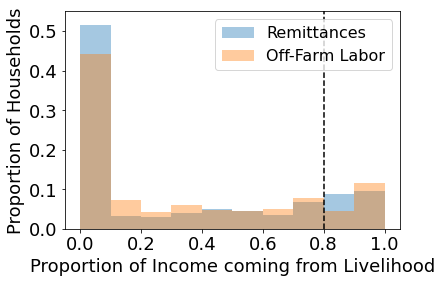

In [38]:
#Histogram of households by contribution of specified category to income

category1 = 'Remittances'
category2 = 'Off-Farm Labor'

x1 = mean_incomeblock_prop[category1 + '_Prop']
x2 = mean_incomeblock_prop[category2 + '_Prop']

plt.hist(x1, weights=np.ones(len(x1)) / len(x1), bins=10, density=False, histtype='stepfilled', alpha=0.4, label=category1)
plt.hist(x2, weights=np.ones(len(x2)) / len(x2), bins=10, density=False, histtype='stepfilled', alpha = 0.4, label=category2)
plt.xlabel('Proportion of Income coming from Livelihood', fontsize=18)
plt.xticks(size=18)
plt.ylabel('Proportion of Households', fontsize=18)
plt.yticks(size=18)
plt.ylim([0,0.55])
plt.axvline(0.8, ls='--', color='black')
plt.legend(fontsize=16, loc='upper right')
#plt.show()
plt.savefig('Combined_PropHistogram.png', bbox_inches='tight')

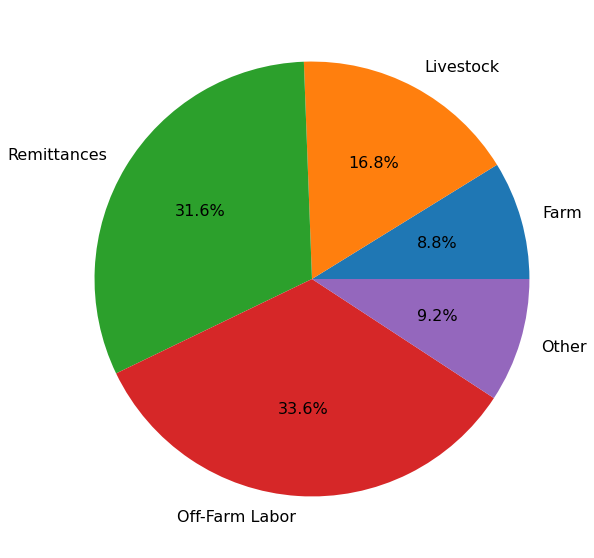

In [18]:
#Creating simplified pie chart of mean income proportions

#income_categories = {'Farm': ['Farming'], 'Livestock':['MeatMilk', 'SmallAnimals', 'Poultry'], 'Remittances':['LocalRemit', 'IntilRemit'], 'Off-Farm Labor':['Business', 'Salary', 'WageLabor'], 'Other':['Pension', 'Other']}
#income_values = {key : 0 for key in income_categories}

income_values = []
for col in mean_incomeblock_prop.columns[2:]:
    income_values.append(mean_incomeblock_prop[col].mean())
        

#Creating plot
fig = plt.figure(figsize =(10, 10))
plt.pie(income_values, labels = income_dict.keys(), autopct='%1.1f%%', textprops={'fontsize': 16})

plt.show()

#plt.savefig('CategoryIncomePie.png', bbox_inches='tight')